In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [18]:
# with open("data_config.pkl", "rb") as f:
#     data_config = pickle.load(f)

train_dir = r"D:\GitHub\Computer_Vision\Teeth_Dataset\Training"
test_dir = r"D:\GitHub\Computer_Vision\Teeth_Dataset\Testing"
val_dir = r"D:\GitHub\Computer_Vision\Teeth_Dataset\Validation"
img_size = (128, 128)
batch_size = 32

# Recreate the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

print("Data generators reloaded successfully.")

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Data generators reloaded successfully.


In [19]:
import pickle

# Save dataset paths instead of the generators
data_config = {
    "train_dir": train_dir,
    "val_dir": val_dir,
    "test_dir": test_dir,
    "img_size": img_size,
    "batch_size": batch_size
}

# Save the configuration instead of generators
with open("data_config.pkl", "wb") as f:
    pickle.dump(data_config, f)

print("Preprocessing complete. Dataset paths and parameters saved.")


Preprocessing complete. Dataset paths and parameters saved.


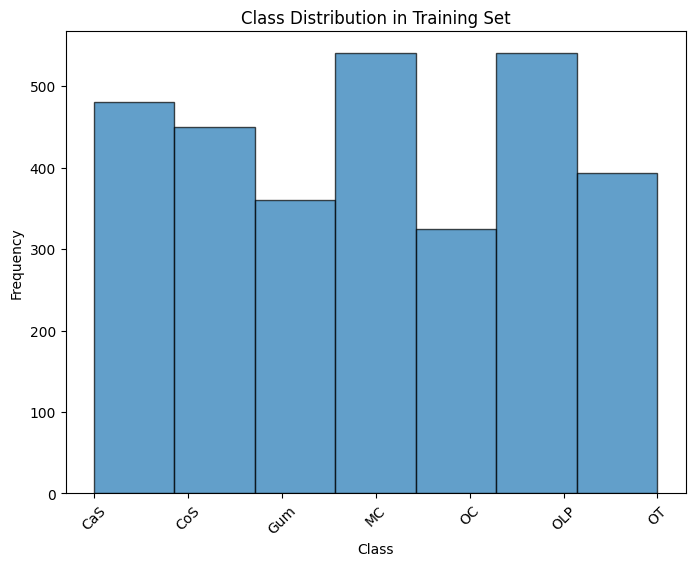

In [20]:
labels = train_generator.classes
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=len(class_names), edgecolor='black', alpha=0.7)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Set")
plt.show()

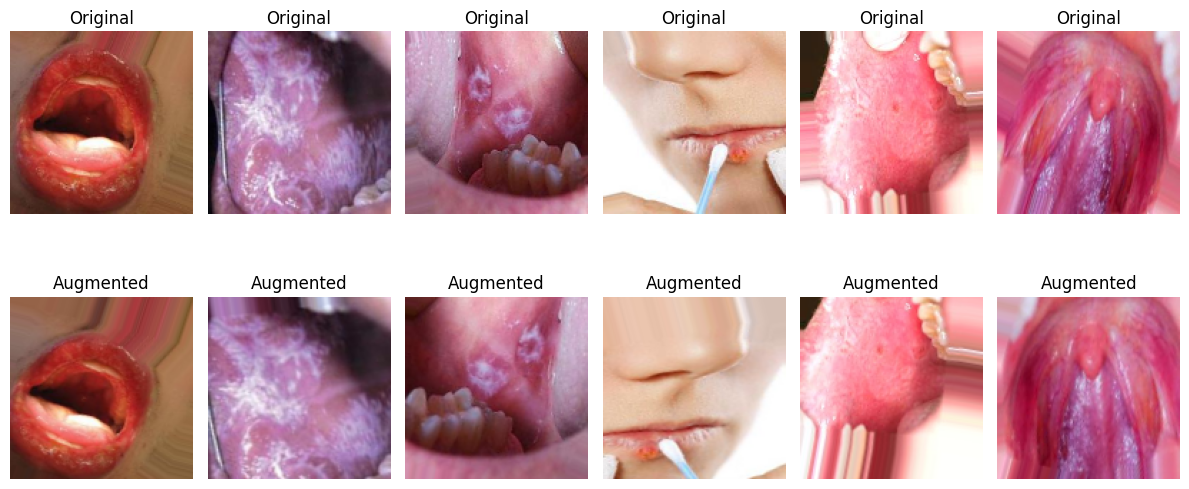

In [11]:


# Fetch a batch of original images
x_batch, y_batch = next(train_generator)

# Create a new ImageDataGenerator for augmentation
augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Apply augmentation manually to ensure consistency
augmented_batch = np.array([augmenter.random_transform(img) for img in x_batch])

# Plot before and after augmentation
plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 6, i + 1)
    plt.imshow(np.clip(x_batch[i], 0, 1))  # Fix black images issue
    plt.axis("off")
    plt.title("Original")

for i in range(6):
    plt.subplot(2, 6, i + 7)
    plt.imshow(np.clip(augmented_batch[i], 0, 1))  # Fix black images issue
    plt.axis("off")
    plt.title("Augmented")

plt.tight_layout()
plt.show()


In [ ]:
# Get the number of classes
num_classes = len(train_generator.class_indices)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use the correct number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.1786 - loss: 1.9540 - val_accuracy: 0.2685 - val_loss: 1.8556
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - accuracy: 0.2806 - loss: 1.8186 - val_accuracy: 0.3619 - val_loss: 1.6411
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3535 - loss: 1.6105

In [22]:
# Evaluate the model on training, validation, and test sets
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)
test_loss, test_acc = model.evaluate(test_generator)

# Print the accuracy results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7267 - loss: 0.8236
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5847 - loss: 1.1607
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.5618 - loss: 1.1685
Train Accuracy: 0.7357
Validation Accuracy: 0.5807
Test Accuracy: 0.5613


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
model.save("teeth_classification_model.h5")
print("Model training complete and saved as 'teeth_classification_model.h5'")